In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('census_income.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df = data.copy()

In [5]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
#total rows and columns in dataset
df.shape

(32561, 15)

In [10]:
#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()

In [11]:
#encoding income column
df['income'] = df['income'].replace('>50K',1)

In [12]:
#people whose earning less than 50K
df[df['income']==0].shape

(0, 15)

In [13]:
#people whose earning more than 50K
df[df['income']==1].shape

(7841, 15)

In [14]:
#cleaning rows
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
#doing private job and salary more than 50K
new_df = df[df['workclass']=='Private']
print(len(new_df[new_df['income']==1]))
new_df[new_df['income']==1].head(2)

4876


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,1


### There is 4876 people are doing job in private class and earn more than 50K

<AxesSubplot:xlabel='income'>

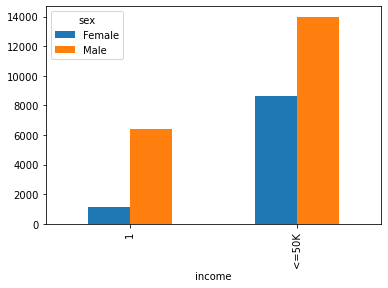

In [17]:
#cheacking male and female ration according to their salary
class_sex = pd.crosstab(df['income'],df['sex'])
class_sex.plot(kind='bar')

In [18]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [19]:
#how many of people whose age above avarge earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['income']==1]))
avg_age[avg_age['income']==1].head(2)

5042


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1


- There is '5042' people whose age is greater than average age earning more than 50K

In [20]:
#how many of people whose age above avarge earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['income']==0]))
avg_age[avg_age['income']==0].head(2)

0


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


<AxesSubplot:xlabel='income'>

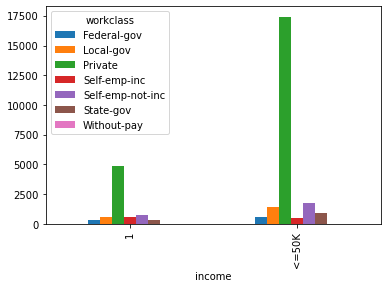

In [21]:
#cheacking distribution of people in workclass according to salary
class_salary = pd.crosstab(df['income'],df['workclass'])
class_salary.plot(kind='bar')

- we seen from above private class people is more than other classes in both type of category of income

<AxesSubplot:xlabel='education'>

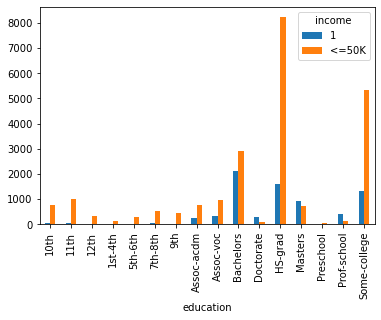

In [22]:
#cheacking distribution of people according to income
salary_education = pd.crosstab(df['education'],df['income'])
salary_education.plot(kind='bar')

In [23]:
#numeric columns
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)

In [24]:
num_col = num_col[0:2]
num_col 

['age', 'fnlwgt']

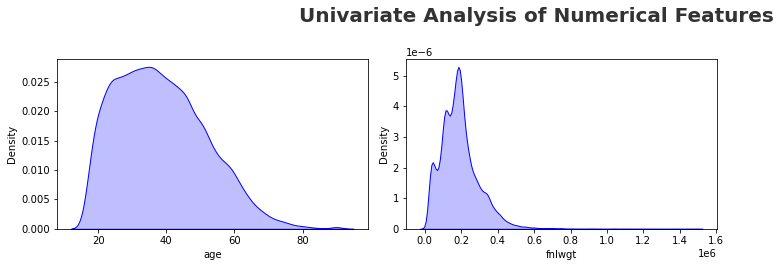

In [25]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', 
             fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [26]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)

In [27]:
cat_col

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

<Figure size 432x288 with 0 Axes>

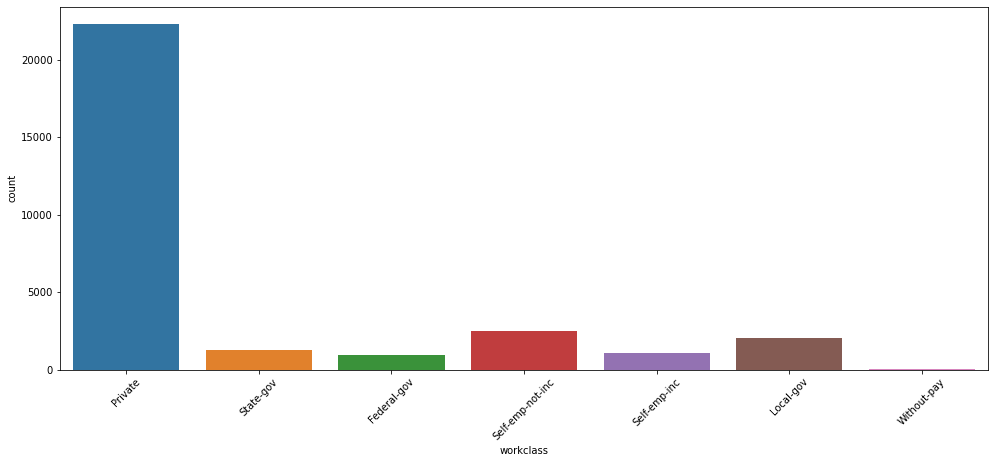

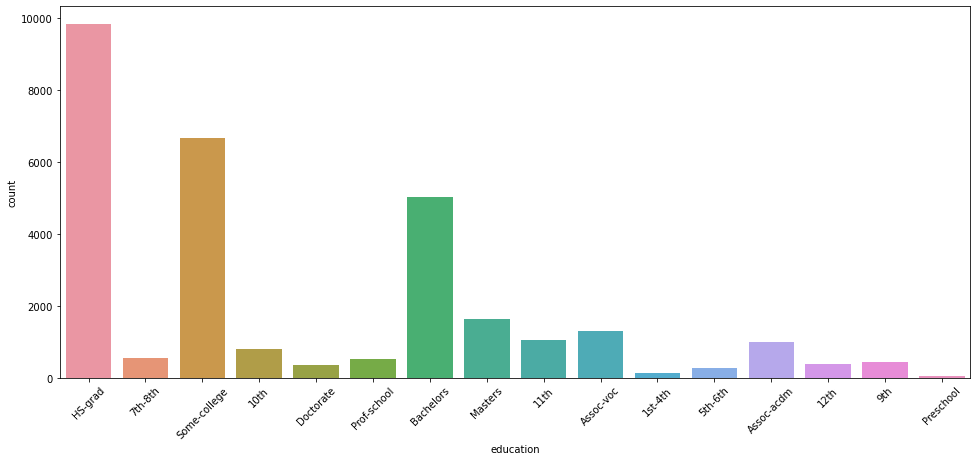

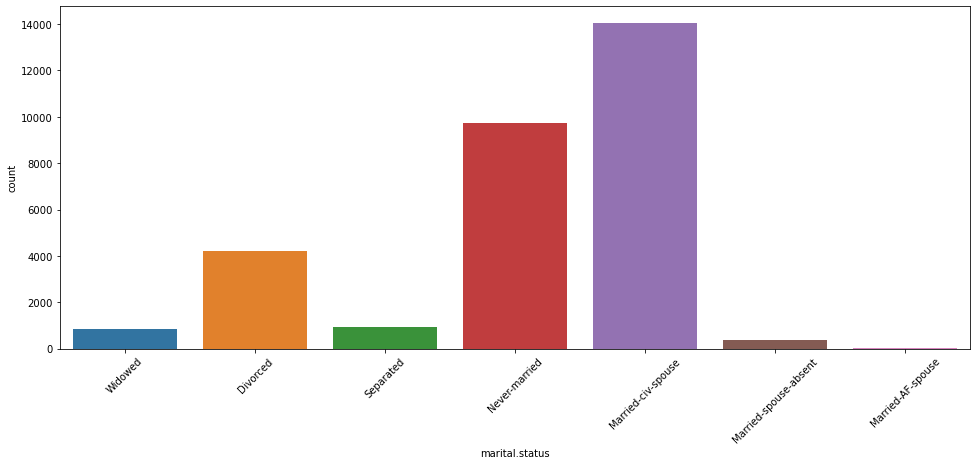

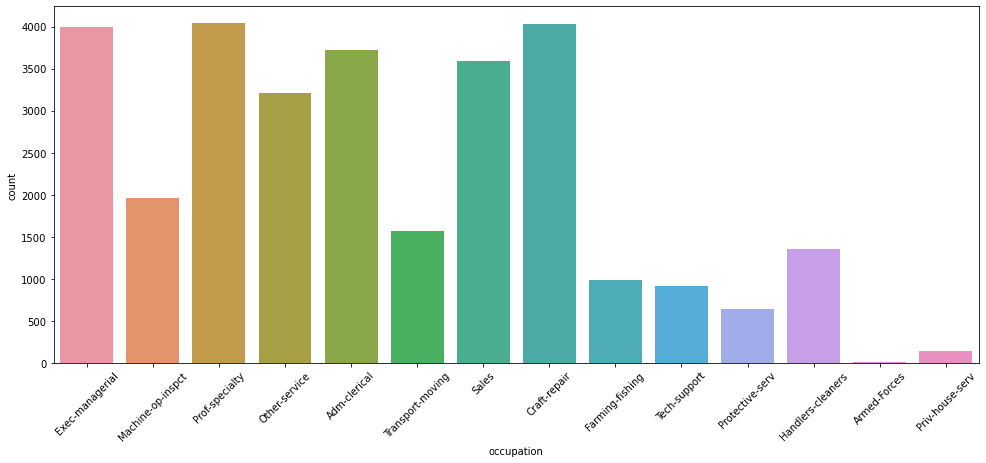

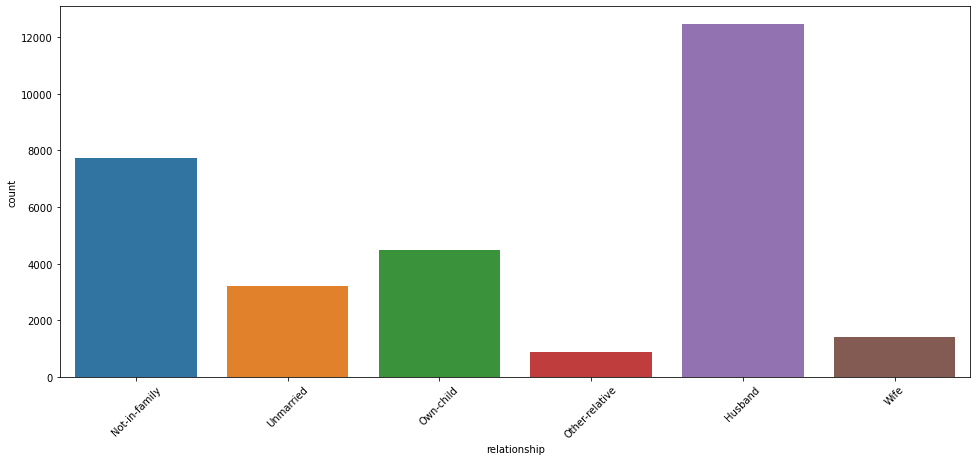

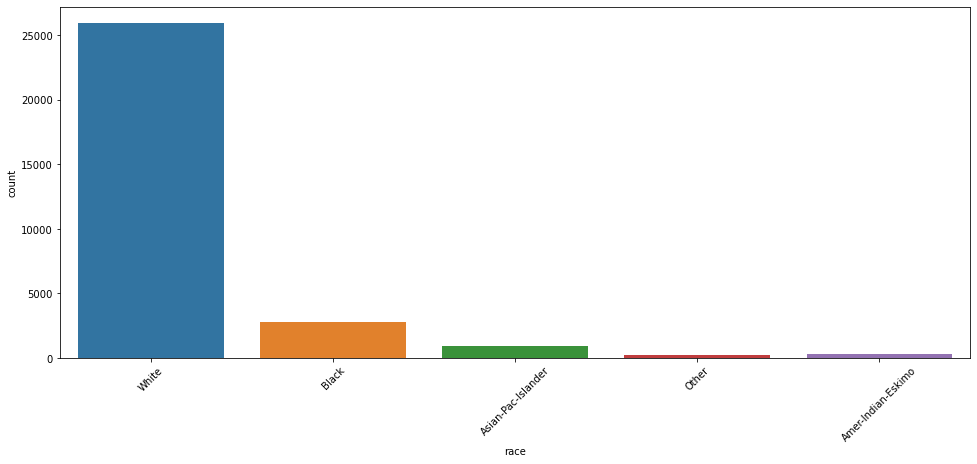

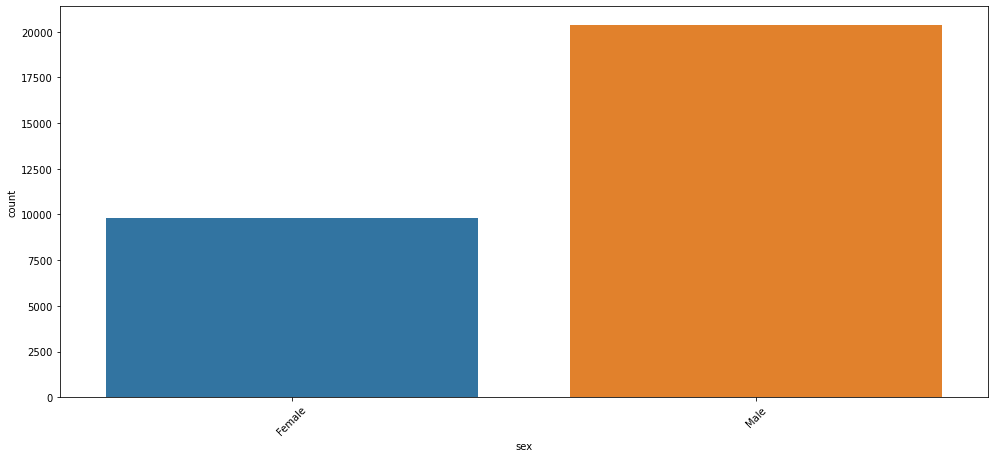

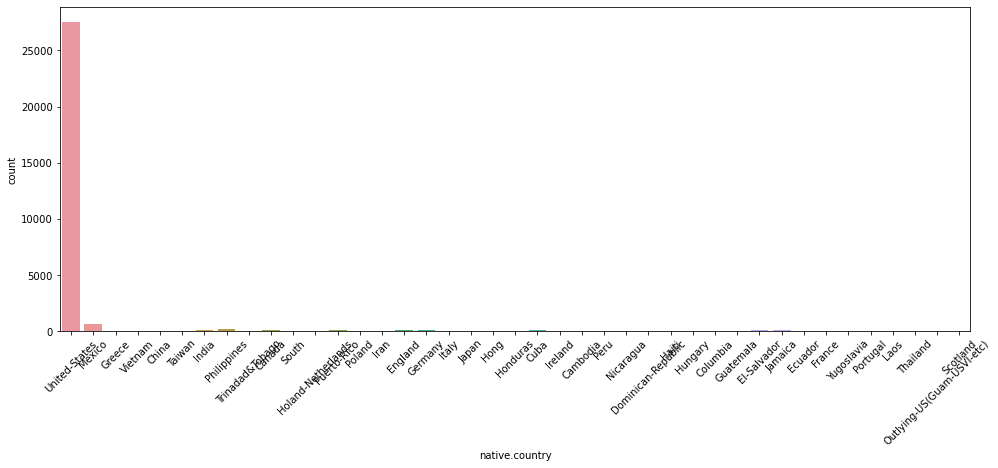

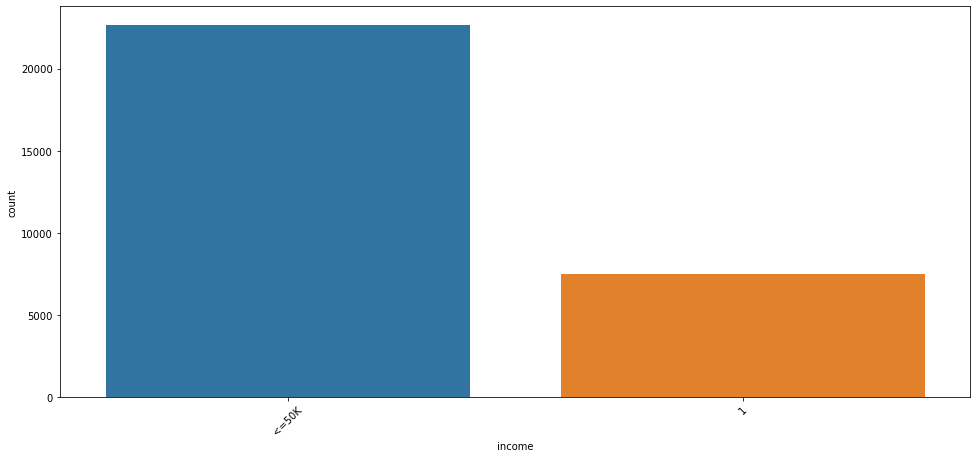

In [28]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', 
             fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Check Multicollinearity in Numerical features

In [29]:
df[(list(df.columns)[1:])].corr()

,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
fnlwgt,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,-0.022886,0.152522,0.080432,0.052417,1.000000


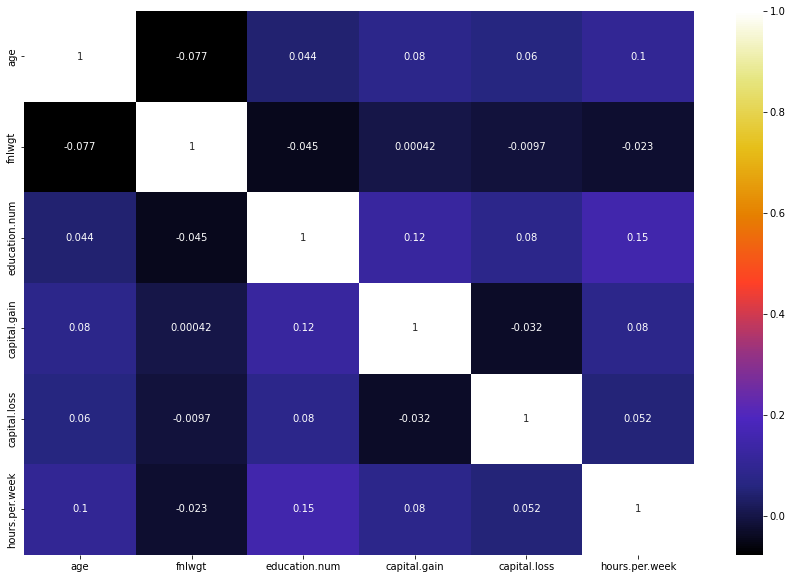

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

- So their is no multicollinearity in numeric feature

### Check Multicollinearity for Categorical features
-  A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test    statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

-  A chi-square statistic is one way to show a relationship between two categorical variables.
### We test correlation of Categorical columns with Target column i.e income

In [31]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['income'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital.status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,native.country,Reject Null Hypothesis
8,income,Reject Null Hypothesis


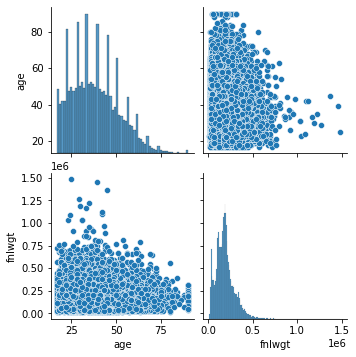

In [32]:
sns.pairplot(df[num_col])

## Checking outliers

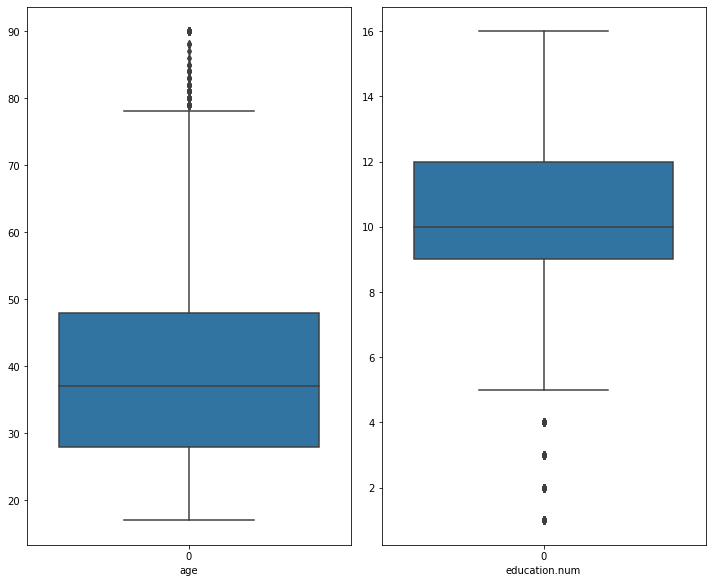

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame 'df' with the necessary columns
df = pd.read_csv('census_income.csv') 

num_col = ["age", "education.num"]  # the list of numerical column names

plt.figure(figsize=(10, 40))

for i in range(len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

plt.tight_layout()
plt.show()

- we can see that to many outliers are there so we have to treat them before going to model building

## Treating outliers

In [34]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()

In [35]:
replace_with_thresholds(df,num_col)

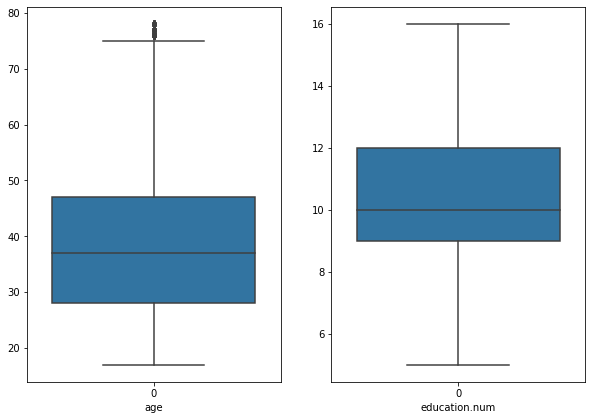

In [36]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

### Creating a new copy of dataset(df) and convert it into numerical with the help of labelEncoder

In [37]:
new_df = df.copy()

In [38]:
new_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,38.581647,?,77053,HS-grad,9.000000,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,38.581647,Private,132870,HS-grad,9.000000,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66.000000,?,186061,Some-college,10.000000,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54.000000,Private,140359,7th-8th,10.080679,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41.000000,Private,264663,Some-college,10.000000,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.000000,Private,310152,Some-college,10.000000,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27.000000,Private,257302,Assoc-acdm,12.000000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40.000000,Private,154374,HS-grad,9.000000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58.000000,Private,151910,HS-grad,9.000000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [39]:
new_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,38.581647,?,77053,HS-grad,9.000000,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,38.581647,Private,132870,HS-grad,9.000000,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66.000000,?,186061,Some-college,10.000000,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54.000000,Private,140359,7th-8th,10.080679,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41.000000,Private,264663,Some-college,10.000000,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [40]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [41]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]
data_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [42]:
data_encoded = encoder.fit_transform(data_categorical)

In [43]:
a = pd.DataFrame(data_encoded,columns=['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'country','salary'])
b = data[['age','hours.per.week']]

new_df = pd.concat([b,a],axis=1)

In [44]:
new_df

,age,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,country,salary
0,90,40,0.0,11.0,6.0,0.0,1.0,4.0,0.0,39.0,0.0
1,82,18,4.0,11.0,6.0,4.0,1.0,4.0,0.0,39.0,0.0
2,66,40,0.0,15.0,6.0,0.0,4.0,2.0,0.0,39.0,0.0
3,54,40,4.0,5.0,0.0,7.0,4.0,4.0,0.0,39.0,0.0
4,41,40,4.0,15.0,5.0,10.0,3.0,4.0,0.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,40,4.0,15.0,4.0,11.0,1.0,4.0,1.0,39.0,0.0
32557,27,38,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32558,40,40,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32559,58,40,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0


## Build a Model

In [45]:
new_df.shape

(32561, 11)

## Dependent and Independent features

In [46]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

## Train test split

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21815, 10)
(21815,)
(10746, 10)
(10746,)


## scaling data

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [50]:
X_test = scaler.transform(X_test)

## Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
model.score(X_train,y_train)

0.7615860646344259

In [53]:
log_pred = model.predict(X_test)

In [54]:
accuracy_score(y_test,log_pred)

0.7644705006514052

In [55]:
from sklearn.model_selection import RandomizedSearchCV

params = dict(penalty=['l1','l2','elasticnet'],C=[1,0.1,0.01,10,100])

best_log_model = RandomizedSearchCV(model, params, random_state=7)
best_log_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 0.1, 0.01, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=7)

In [56]:
best_log_model.best_params_

{'penalty': 'l2', 'C': 0.01}

In [57]:
best_model = LogisticRegression(penalty='l2',C = 10)

In [58]:
best_model.fit(X_train,y_train)

LogisticRegression(C=10)

In [59]:
best_pred = best_model.predict(X_test)

In [60]:
accuracy_score(y_test,best_pred)

0.7644705006514052

## RandomForest Classifier

In [61]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
model.score(X_train,y_train)

0.9724043089617236

In [63]:
model_pred = model.predict(X_test)

In [64]:
accuracy_score(y_test,model_pred)

0.8222594453750233

In [65]:
params = dict(criterion=['gini', 'entropy'],max_depth=[1,10,5],min_samples_split=[1,10])

In [66]:
best_ran_model = RandomizedSearchCV(model,params,random_state=7)
best_ran_model.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 5],
                                        'min_samples_split': [1, 10]},
                   random_state=7)

In [67]:
best_ran_model.best_params_

{'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}

In [68]:
best_model = RandomForestClassifier(min_samples_split= 5, max_depth= 10, 
                                    criterion= 'entropy').fit(X_train,y_train)

In [69]:
best_model.score(X_train,y_train)

0.849553059821224

In [70]:
best_pred = best_model.predict(X_test)

In [71]:
accuracy_score(y_test,best_pred)

0.8391959798994975

## Naive Bayes

In [72]:
model  = GaussianNB().fit(X_train,y_train)

In [73]:
model.score(X_train,y_train)

0.7607609443043777

In [74]:
model_pred = model.predict(X_test)

In [75]:
accuracy_score(y_test,model_pred)

0.7527452075190769

## SVC

In [76]:
svc = SVC().fit(X_train,y_train)

In [77]:
svc.score(X_train,y_train)

0.812193444877378

In [78]:
svc_pred = svc.predict(X_test)
accuracy_score(y_test,svc_pred)

0.8063465475525777

## Hyperparameter Tunning

In [79]:
params = dict(kernel=['linear', 'poly'],C=[1,0.1,0.01])

In [80]:
Grid_model = GridSearchCV(svc,params,n_jobs=-1)

In [81]:
Grid_model.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01], 'kernel': ['linear', 'poly']})

In [82]:
Grid_model.best_params_

{'C': 1, 'kernel': 'poly'}

In [83]:
best_model = SVC(kernel='poly',gamma='scale',C=1).fit(X_train,y_train)

In [84]:
best_model.score(X_train,y_train)

0.7700664680265872

In [85]:
best_pred = best_model.predict(X_test)

In [86]:
accuracy_score(y_test,best_pred)

0.7657733109994417